# BOOKS RECOMMENDATION SYSTEM USING NEAREST NEIGHBORS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Datasets

In [2]:
books = pd.read_csv("BX-Books.csv",sep = ';',error_bad_lines = False,encoding = "latin-1",usecols = ['ISBN','Book-Title'])
books

,ISBN,Book-Title
0,0195153448,Classical Mythology
1,0002005018,Clara Callan
2,0060973129,Decision in Normandy
3,0374157065,Flu: The Story of the Great Influenza Pandemic...
4,0393045218,The Mummies of Urumchi
...,...,...
271374,0440400988,There's a Bat in Bunk Five
271375,0525447644,From One to One Hundred
271376,006008667X,Lily Dale : The True Story of the Town that Ta...
271377,0192126040,Republic (World's Classics)


In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ISBN        271379 non-null  object
 1   Book-Title  271379 non-null  object
dtypes: object(2)
memory usage: 4.1+ MB


In [4]:
ratings = pd.read_csv("BX-Book-Ratings.csv",sep = ';',error_bad_lines = False,encoding = "latin-1")
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


C:\Users\tom97\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Book-Rating', ylabel='count'>

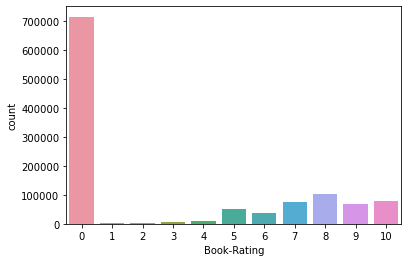

In [6]:
sns.countplot(ratings['Book-Rating'])

In [7]:
users = pd.read_csv("BX-Users.csv",sep = ';',error_bad_lines = False,encoding = "latin-1")

In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [9]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


## EDA

In [10]:
count_num_of_users_rating = ratings['User-ID'].value_counts()
count_num_of_users_rating

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
271728        1
245123        1
234886        1
259466        1
187812        1
Name: User-ID, Length: 105283, dtype: int64

In [11]:
ratings = ratings[ratings['User-ID'].isin(count_num_of_users_rating[count_num_of_users_rating>=100].index)]

In [12]:
ratings

,User-ID,ISBN,Book-Rating
412,276925,0006511929,0
413,276925,002542730X,10
414,276925,0060520507,0
415,276925,0060930934,0
416,276925,0060951303,0
...,...,...,...
1149633,276680,1884910033,0
1149634,276680,1888173408,7
1149635,276680,1888173564,8
1149636,276680,1888173572,0


In [13]:
count_num_of_books_rating = ratings['ISBN'].value_counts()
count_num_of_books_rating

0971880107    617
0316666343    430
0385504209    325
0060928336    306
044021145X    276
             ... 
0446605476      1
3550079753      1
8425329574      1
0880322403      1
0967469708      1
Name: ISBN, Length: 240478, dtype: int64

In [14]:
ratings = ratings[ratings['ISBN'].isin(count_num_of_books_rating[count_num_of_books_rating>=50].index)]

In [15]:
ratings

,User-ID,ISBN,Book-Rating
413,276925,002542730X,10
426,276925,0316666343,0
429,276925,0385504209,8
453,276925,0804106304,0
457,276925,0971880107,0
...,...,...,...
1149551,276680,0440221595,8
1149553,276680,0446670251,0
1149567,276680,0670030643,0
1149577,276680,0679731725,0


In [16]:
ratings_books = ratings.merge(books,on = 'ISBN')
ratings_books

,User-ID,ISBN,Book-Rating,Book-Title
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
2,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
3,10030,002542730X,7,Politically Correct Bedtime Stories: Modern Ta...
4,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
...,...,...,...,...
72817,252865,0380817691,0,Stalker: A Peter Decker and Rina Lazarus Novel
72818,257204,0380817691,0,Stalker: A Peter Decker and Rina Lazarus Novel
72819,258534,0380817691,10,Stalker: A Peter Decker and Rina Lazarus Novel
72820,267635,0380817691,0,Stalker: A Peter Decker and Rina Lazarus Novel


In [17]:
count_book_ratings = pd.DataFrame(ratings_books.groupby('Book-Title')['Book-Rating'].count())
count_book_ratings.rename(columns = {'Book-Rating':'Num_of_ratings'},inplace = True)
count_book_ratings.reset_index()

,Book-Title,Num_of_ratings
0,1984,77
1,1st to Die: A Novel,230
2,2010: Odyssey Two,53
3,204 Rosewood Lane,50
4,2nd Chance,179
...,...,...
798,Year of Wonders,82
799,You Belong To Me,67
800,Zen and the Art of Motorcycle Maintenance: An ...,71
801,Zoya,62


In [18]:
ratings_books = ratings_books.merge(count_book_ratings, on = 'Book-Title')

In [19]:
ratings_books

,User-ID,ISBN,Book-Rating,Book-Title,Num_of_ratings
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,102
1,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,102
2,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,102
3,10030,002542730X,7,Politically Correct Bedtime Stories: Modern Ta...,102
4,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,102
...,...,...,...,...,...
72817,252865,0380817691,0,Stalker: A Peter Decker and Rina Lazarus Novel,51
72818,257204,0380817691,0,Stalker: A Peter Decker and Rina Lazarus Novel,51
72819,258534,0380817691,10,Stalker: A Peter Decker and Rina Lazarus Novel,51
72820,267635,0380817691,0,Stalker: A Peter Decker and Rina Lazarus Novel,51


In [20]:
ratings_books['Num_of_ratings'].value_counts()

51     1632
53     1537
50     1400
58     1392
67     1273
       ... 
131     131
126     126
114     114
112     112
98       98
Name: Num_of_ratings, Length: 154, dtype: int64

## Matrix Preparation for Model Building

In [21]:
from scipy.sparse import csr_matrix

ratings_books = ratings_books.drop_duplicates(['User-ID','Book-Title'])
matrix = ratings_books.pivot_table(index = 'Book-Title',columns = 'User-ID',values = 'Book-Rating').fillna(0)

csr_matrix = csr_matrix(matrix)

## Traing Model using Nearest Neighbors

In [22]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')

model.fit(csr_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [23]:
matrix 

User-ID,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,276018,276463,276680,276925,277427,277478,277639,278137,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
matrix.to_csv("matrix")

In [25]:
X = pd.DataFrame(matrix.index)
X.reset_index(inplace = True)
X.rename(columns = {'index':'Serial_No'},inplace = True)
X

,Serial_No,Book-Title
0,0,1984
1,1,1st to Die: A Novel
2,2,2010: Odyssey Two
3,3,204 Rosewood Lane
4,4,2nd Chance
...,...,...
798,798,Year of Wonders
799,799,You Belong To Me
800,800,Zen and the Art of Motorcycle Maintenance: An ...
801,801,Zoya


In [26]:
df = X.set_index('Book-Title').to_dict()['Serial_No']
df

{'1984': 0,
 '1st to Die: A Novel': 1,
 '2010: Odyssey Two': 2,
 '204 Rosewood Lane': 3,
 '2nd Chance': 4,
 '4 Blondes': 5,
 'A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))': 6,
 'A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash': 7,
 'A Bend in the Road': 8,
 'A Case of Need': 9,
 'A Child Called \\It\\": One Child\'s Courage to Survive"': 10,
 'A Civil Action': 11,
 'A Confederacy of Dunces (Evergreen Book)': 12,
 'A Cry In The Night': 13,
 'A Dangerous Fortune': 14,
 'A Fine Balance': 15,
 'A Girl Named Zippy: Growing Up Small in Mooreland Indiana (Today Show Book Club #3)': 16,
 'A Great Deliverance': 17,
 'A Heartbreaking Work of Staggering Genius': 18,
 'A Is for Alibi (Kinsey Millhone Mysteries (Paperback))': 19,
 'A Lesson Before Dying (Vintage Contemporaries (Paperback))': 20,
 'A Light in the Window (The Mitford Years)': 21,
 'A Man in Full': 22,
 'A Map of the World': 23,
 'A Painted House': 24,
 'A Patchwo

In [27]:
y = df["A Fine Balance"]
y

15

In [28]:
matrix.shape[0]

803

In [29]:
q = np.random.choice(matrix.shape[0])

In [30]:
q

617

In [31]:
matrix.iloc[q,:]

User-ID
254       0.0
507       0.0
882       0.0
1424      0.0
1435      0.0
         ... 
277478    0.0
277639    0.0
278137    0.0
278188    0.0
278418    0.0
Name: The Gunslinger (The Dark Tower, Book 1), Length: 1787, dtype: float64

In [32]:
matrix.iloc[q,:].values

array([0., 0., 0., ..., 0., 0., 0.])

In [33]:
matrix.iloc[q,:].values.reshape(1,-1)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [34]:
distances,indices = model.kneighbors(matrix.iloc[q,:].values.reshape(1,-1),n_neighbors = 6)

In [35]:
distances

array([[2.22044605e-16, 5.40752841e-01, 6.96981269e-01, 7.63002738e-01,
        7.83788786e-01, 8.03108319e-01]])

In [36]:
indices

array([[617, 581,  86, 378, 483, 708]], dtype=int64)

In [37]:
matrix.index[q]

'The Gunslinger (The Dark Tower, Book 1)'

In [38]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(matrix.index[q]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, matrix.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for The Gunslinger (The Dark Tower, Book 1):

1: The Drawing of the Three (The Dark Tower, Book 2), with distance of 0.5407528409239368:
2: Black House, with distance of 0.6969812687535264:
3: Nightmares &amp; Dreamscapes, with distance of 0.7630027384347668:
4: Skeleton Crew, with distance of 0.7837887861209234:
5: The Tale of the Body Thief (Vampire Chronicles (Paperback)), with distance of 0.8031083192608771:


## Serializing the model built

In [39]:
import pickle

file = open('model.pkl','wb')
pickle.dump(model,file)
